# Linear Regression on ICTP Openstack

Here we do the exact same exercise we did on Google Colab. We'll have some alternative data sets to suggest using, but this will work best if you have a dataset you are interested in analyzing. 

**NOTE:** There are some very slight differences in the system setup. They will be pointed out as they are encountered.

In [ ]:
!sudo apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.1.3/spark-3.1.3-bin-hadoop3.2.tgz
!tar xf spark-3.1.3-bin-hadoop3.2.tgz
!pip install -q findspark pandas matplotlib six
print("Spark Installation Complete")

Above we use the sudo command in the first command to install openjdk (Java Development Toolkit) as root. 

We also install all of the Python libraries we use later rather than do this as we go.

**NOTE:** This step will take a few  minutes, be patient, Spark is a large package. 

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.1.3-bin-hadoop3.2"
print("Environment Set")

Environment Set


Above we've changed the SPARK_HOME environmental variable, to adjust to where the notebook looks for Spark. 

In [6]:
import findspark
findspark.init()
print("Findspark Initialized")

Findspark Initialized


In [7]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc = SparkContext()
sqlContext = SQLContext(sc)
print("PySpark libraries imported and SQL Context set")

PySpark libraries imported and SQL Context set


Below is where you import a CSV data set. If you are feeling adventurous use a data set you are interested in... If you are not quite feeling so adventurous, use one of the following dataset addresses. 

   * Kaggle.com
      * Worldwide COVID Stats: https://www.kaggle.com/imdevskp/corona-virus-report
      * World Bank Data Sets: https://www.kaggle.com/docstein/brics-world-bank-indicators
      * English Premeir League Stats: https://www.kaggle.com/rajatrc1705/english-premier-league202021
   

In [8]:
!wget https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/Boston.csv
house_df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('Boston.csv')
house_df.take(5)

--2021-06-22 17:15:52--  https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/Boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37658 (37K) [text/plain]
Saving to: ‘Boston.csv’

Boston.csv          100%[===================>]  36.78K  --.-KB/s    in 0.008s  

2021-06-22 17:15:52 (4.61 MB/s) - ‘Boston.csv’ saved [37658/37658]



[Row(_c0=1, crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, black=396.9, lstat=4.98, medv=24.0),
 Row(_c0=2, crim=0.02731, zn=0.0, indus=7.07, chas=0, nox=0.469, rm=6.421, age=78.9, dis=4.9671, rad=2, tax=242, ptratio=17.8, black=396.9, lstat=9.14, medv=21.6),
 Row(_c0=3, crim=0.02729, zn=0.0, indus=7.07, chas=0, nox=0.469, rm=7.185, age=61.1, dis=4.9671, rad=2, tax=242, ptratio=17.8, black=392.83, lstat=4.03, medv=34.7),
 Row(_c0=4, crim=0.03237, zn=0.0, indus=2.18, chas=0, nox=0.458, rm=6.998, age=45.8, dis=6.0622, rad=3, tax=222, ptratio=18.7, black=394.63, lstat=2.94, medv=33.4),
 Row(_c0=5, crim=0.06905, zn=0.0, indus=2.18, chas=0, nox=0.458, rm=7.147, age=54.2, dis=6.0622, rad=3, tax=222, ptratio=18.7, black=396.9, lstat=5.33, medv=36.2)]

In [11]:
house_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [12]:
house_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
_c0,506,253.5,146.2138844296259,1,506
crim,506,3.6135235573122535,8.601545105332491,0.00632,88.9762
zn,506,11.363636363636363,23.32245299451514,0.0,100.0
indus,506,11.136778656126504,6.860352940897589,0.46,27.74
chas,506,0.0691699604743083,0.2539940413404101,0,1
nox,506,0.5546950592885372,0.11587767566755584,0.385,0.871
rm,506,6.284634387351787,0.7026171434153232,3.561,8.78
age,506,68.57490118577078,28.148861406903595,2.9,100.0
dis,506,3.795042687747034,2.10571012662761,1.1296,12.1265


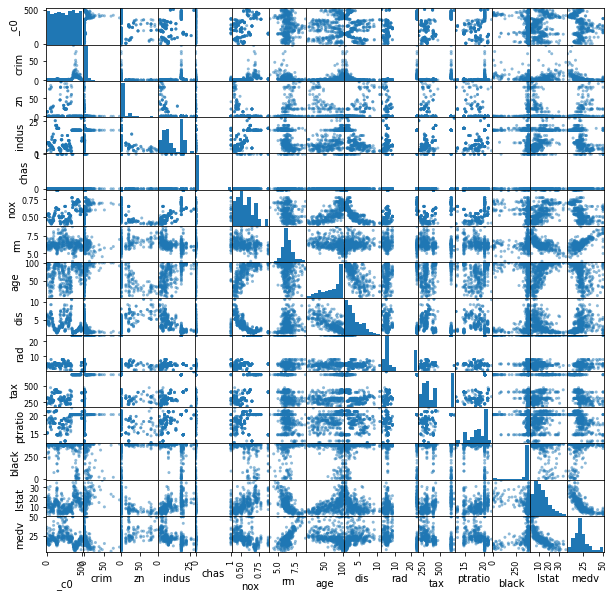

In [14]:
import pandas as pd
numeric_features = [t[0] for t in house_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = house_df.select(numeric_features).sample(False,0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10,10))

In [15]:
import six
for i in house_df.columns: 
  if not ( isinstance(house_df.select(i).take(1)[0][0], six.string_types)):
    print( "Correlation to MV for ", i, house_df.stat.corr("medv", i))

Correlation to MV for  _c0 -0.22660364293533927
Correlation to MV for  crim -0.38830460858681154
Correlation to MV for  zn 0.3604453424505433
Correlation to MV for  indus -0.4837251600283728
Correlation to MV for  chas 0.1752601771902987
Correlation to MV for  nox -0.4273207723732821
Correlation to MV for  rm 0.6953599470715401
Correlation to MV for  age -0.3769545650045961
Correlation to MV for  dis 0.249928734085904
Correlation to MV for  rad -0.38162623063977735
Correlation to MV for  tax -0.46853593356776674
Correlation to MV for  ptratio -0.5077866855375622
Correlation to MV for  black 0.3334608196570661
Correlation to MV for  lstat -0.7376627261740145
Correlation to MV for  medv 1.0


In [16]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols= ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'black', 'lstat'], outputCol='features')
vhouse_df = vectorAssembler.transform(house_df)
vhouse_df = vhouse_df.select(['features', 'medv'])
vhouse_df.show(5)

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
+--------------------+----+
only showing top 5 rows



In [17]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]
print("Dataset Split")

Dataset Split


In [18]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol= 'features', labelCol='medv', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.04368421778852119,0.0018544228843700892,-0.023838534558917046,2.9293390459698223,-6.2967867130455515,4.685087580607009,0.0,-0.5936463907109312,0.0,-0.9164712073886545,0.003632970836482303,-0.5356086115193955]
Intercept: 21.57065062321636


In [19]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.782982
r2: 0.755049


In [20]:
train_df.describe().show()

+-------+-----------------+
|summary|             medv|
+-------+-----------------+
|  count|              349|
|   mean|22.98710601719199|
| stddev|9.677924277702063|
|    min|              5.0|
|    max|             50.0|
+-------+-----------------+



In [21]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction", "medv", "features").show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 28.06793415823776|22.0|[0.01096,55.0,2.2...|
|31.600615619585756|31.6|[0.01432,100.0,1....|
|26.835864703087402|30.1|[0.01709,90.0,2.0...|
|31.690494287450065|31.1|[0.02187,60.0,2.9...|
|27.394725875277818|16.5|[0.02498,0.0,1.89...|
+------------------+----+--------------------+
only showing top 5 rows



In [22]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="medv", metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.572322


In [23]:
test_result = lr_model.evaluate(test_df)
print('Root Mean Squared Error (RMSE) on test data = %g' % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 5.19039


In [24]:
print("Number of Iterations: %d" % trainingSummary.totalIterations)
print("Objective History %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show(5)

Number of Iterations: 10
Objective History [0.5000000000000009, 0.4314522200862415, 0.20894429734625256, 0.188153147184504, 0.16145131872297858, 0.1593311946556718, 0.15811543039170392, 0.1573022369280786, 0.1570303780181639, 0.1569731933676261, 0.15694718380900025]
+--------------------+
|           residuals|
+--------------------+
| -7.2900387554991894|
|  0.9749445534585881|
|-0.15055194701847796|
|  4.9729272948180245|
|  2.4500400692627267|
+--------------------+
only showing top 5 rows



In [25]:
predictions = lr_model.transform(test_df)
predictions.select("prediction", "medv", 'features').show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 28.06793415823776|22.0|[0.01096,55.0,2.2...|
|31.600615619585756|31.6|[0.01432,100.0,1....|
|26.835864703087402|30.1|[0.01709,90.0,2.0...|
|31.690494287450065|31.1|[0.02187,60.0,2.9...|
|27.394725875277818|16.5|[0.02498,0.0,1.89...|
+------------------+----+--------------------+
only showing top 5 rows



In [26]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol='features', labelCol='medv')
dt_model = dt.fit(train_df)
dt_prediction = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_prediction)
print("Root Mean Square Error (RMSE) on test data = % g" % rmse)

Root Mean Square Error (RMSE) on test data =  3.62702


In [27]:
dt_model.featureImportances

SparseVector(12, {0: 0.0271, 2: 0.0156, 4: 0.0057, 5: 0.6458, 6: 0.0052, 7: 0.0444, 8: 0.0028, 9: 0.005, 10: 0.0326, 11: 0.2158})

In [28]:
house_df.take(1)

[Row(_c0=1, crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, black=396.9, lstat=4.98, medv=24.0)]

In [29]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol= 'features', labelCol = 'medv', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'medv', 'features').show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 22.51051316406506|22.0|[0.01096,55.0,2.2...|
|30.844706108754398|31.6|[0.01432,100.0,1....|
| 32.62233740357151|30.1|[0.01709,90.0,2.0...|
|30.844706108754398|31.1|[0.02187,60.0,2.9...|
| 21.05736769993748|16.5|[0.02498,0.0,1.89...|
+------------------+----+--------------------+
only showing top 5 rows



In [30]:
gbt_evaluator = RegressionEvaluator(labelCol="medv", predictionCol='prediction', metricName='rmse')
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 3.68219
